In [ ]:
# Projektaufgabe: Deskriptive Statistik und Visualisierungen

Age Range
75 years and over    20721
65 to 74 years       32455
60 to 64 years       18088
55 to 59 years       19735
45 to 54 years       49820
35 to 44 years       85669
25 to 34 years       95278
20 to 24 years       27145
10 to 19 years       67758
0 to 9 years         33180
Name: count, dtype: int64



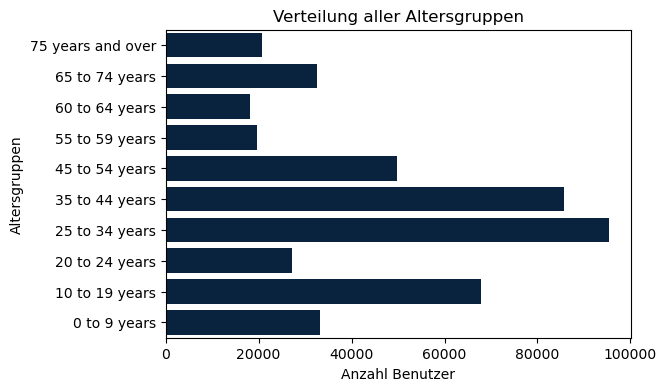

In [13]:
# Wie ist die Altersverteilung der Kunden der San Francisco Public Library?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Library_Usage.csv", usecols=["Age Range"])
df_filtered = df[df["Age Range"] != "Null"]
anzahl_pro_altersgruppe = df_filtered["Age Range"].value_counts().sort_index(ascending=False)
print(anzahl_pro_altersgruppe)
print()
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.values, y=counts.index, color="#002147")
plt.xlabel("Anzahl Benutzer")
plt.ylabel("Altersgruppen")
plt.title("Verteilung aller Altersgruppen")

plt.show()



Age Range
75 years and over    20721
65 to 74 years       32455
60 to 64 years       18088
55 to 59 years       19735
45 to 54 years       49820
35 to 44 years       85669
25 to 34 years       95278
20 to 24 years       27145
10 to 19 years       67758
0 to 9 years         33180
Name: count, dtype: int64



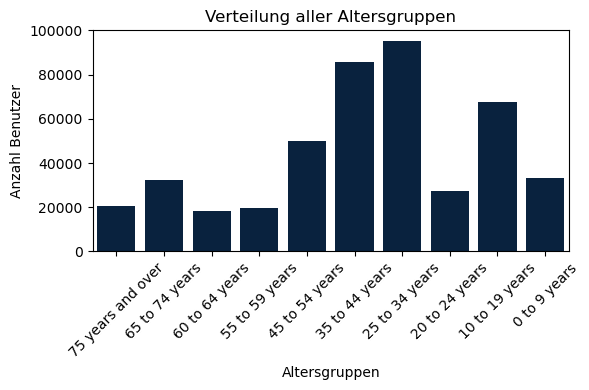

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("../data/Library_Usage.csv", usecols=["Age Range"])

# Filter out rows with "Null" values
df_filtered = df[df["Age Range"] != "Null"]

# Count the number of users in each age group
counts = df_filtered["Age Range"].value_counts().sort_index(ascending=False)

# Print the counts
print(counts)
print()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, color="#002147")

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.xlabel("Altersgruppen")
plt.ylabel("Anzahl Benutzer")
plt.title("Verteilung aller Altersgruppen")

plt.tight_layout()  # This will ensure the labels fit within the figure
plt.show()

Age Range
75 years and over    20721
65 to 74 years       32455
0 to 9 years         33180
Name: count, dtype: int64



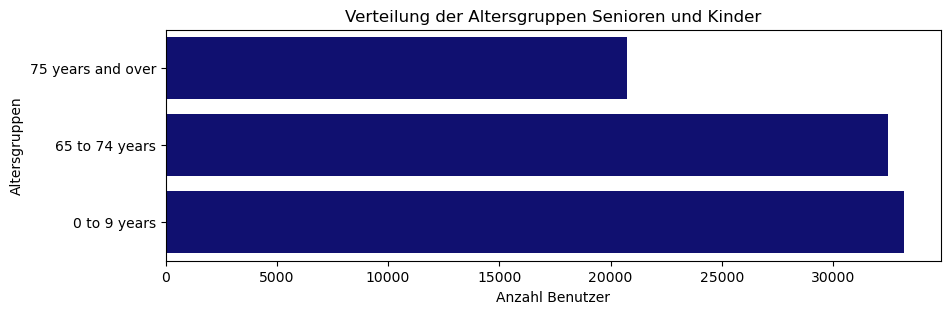

In [24]:
# Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Library_Usage.csv", usecols=["Age Range"])
df_filtered = df[df["Age Range"] != "Null"]
auswahl_altersgruppe = ["0 to 9 years", "65 to 74 years", "75 years and over"] # Auswahl nicht nach patron type, sondern nach age range-Zugehörigkeit
anzahl_pro_ausgewählter_altersgruppe = df_filtered[df_filtered["Age Range"].isin(auswahl_altersgruppe)]["Age Range"].value_counts().sort_index(ascending=False)
print(anzahl_pro_ausgewählter_altersgruppe)
print()
plt.figure(figsize=(10, 3))
sns.barplot(x=anzahl_pro_ausgewählter_altersgruppe.values, y=anzahl_pro_ausgewählter_altersgruppe.index, color="#000080")

plt.xlabel("Anzahl Benutzer")
plt.ylabel("Altersgruppen")
plt.title("Verteilung der Altersgruppen Senioren und Kinder")

plt.show()



In [25]:
# Wie viele Kunden möchten per Mail informiert werden?

import pandas as pd

df = pd.read_csv("../data/Library_Usage.csv", usecols=(["Notice Preference Definition"]))
anzahl = df["Notice Preference Definition"].value_counts() # "Null"-Werte nicht herausgefiltert
print(anzahl)
print()


Notice Preference Definition
Email    409071
Phone     31710
Print      6263
Null       3315
Name: count, dtype: int64



Age Range
75 years and over    16437
65 to 74 years       27987
60 to 64 years       16091
55 to 59 years       18086
45 to 54 years       46797
35 to 44 years       81600
25 to 34 years       90890
20 to 24 years       24544
10 to 19 years       56115
0 to 9 years         30075
Name: count, dtype: int64



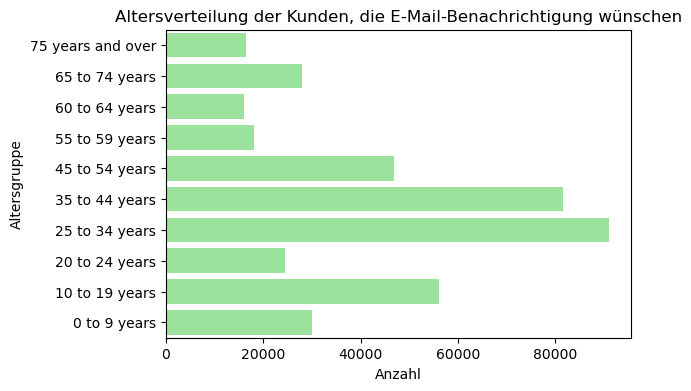

In [30]:
# Altersverteilung der Nutzer, die per Mail informiert werden möchten

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Library_Usage.csv", usecols=["Age Range", "Notice Preference Definition"])
df_filtered = df[(df["Notice Preference Definition"] == "Email") & (df["Age Range"] != "Null")]
anzahl_kunden = df_filtered["Age Range"].value_counts().sort_index(ascending=False)
print(anzahl_kunden)
print()
df_plot = anzahl_kunden.reset_index()
df_plot.columns = ["Age Range", "anzahl_kunden"]
plt.figure(figsize=(6, 4))
sns.barplot(x="anzahl_kunden", y="Age Range", data=df_plot, color="#90EE90")

plt.xlabel("Anzahl")
plt.ylabel("Altersgruppe")
plt.title("Altersverteilung der Kunden, die E-Mail-Benachrichtigung wünschen")

plt.show()

In [41]:
# Wie alt sind Nutzer durchschnittlich, die 1) per Email, 2) per Telefon und 3) per Post informiert werden möchten?

import pandas as pd
import numpy as np
import re  

df = pd.read_csv("../data/Library_Usage.csv", usecols=["Age Range", "Notice Preference Definition"])

# "Null"-Werte entfernen (und "eine explizite Kopie erstellen" -> Hinweis von chatGPT nach Fehlermeldung)
df_filtered = df[df["Notice Preference Definition"] != "Null"].copy()

# Funktion zur Umwandlung von Age Range in Zahlen + Durchschnittsbildung (mit Hilfe von chatGPT erstellt)
def durchschnittsbildung(altersgruppen):
    zahlen_extrahiert = list(map(int, re.findall(r'\d+', str(altersgruppen))))
    return np.mean(zahlen_extrahiert) if zahlen_extrahiert else "Keine Berechnung möglich"

# Durchschnittsalter jeder Altersgruppe berechnen
df_filtered["Durchschnittsalter"] = df_filtered["Age Range"].apply(durchschnittsbildung)

# Nicht numerische Werte entfernen (mit Hilfe von chatGPT erstellt nach Fehlermeldung)
df_filtered = df_filtered[df_filtered["Durchschnittsalter"] != "Keine Berechnung möglich"].copy()
df_filtered["Durchschnittsalter"] = df_filtered["Durchschnittsalter"].astype(float)

durchschnittsalter_zuordnung_benachrichtigungspräferenz = df_filtered.groupby("Notice Preference Definition")["Durchschnittsalter"].mean().round(1)

# Ergebnis ausgeben
for method, alter in durchschnittsalter_zuordnung_benachrichtigungspräferenz.items():
    print(f"Das Durchschnittsalter von Kunden, die {method}-Benachrichtigungen wünschen, beträgt: {alter} Jahre")
print()


Das Durchschnittsalter von Kunden, die Email-Benachrichtigungen wünschen, beträgt: 36.5 Jahre
Das Durchschnittsalter von Kunden, die Phone-Benachrichtigungen wünschen, beträgt: 37.6 Jahre
Das Durchschnittsalter von Kunden, die Print-Benachrichtigungen wünschen, beträgt: 37.8 Jahre



In [47]:
# Wie viele Ausleihen werden pro Altersgruppe und pro Jahr getätigt

import pandas as pd

df = pd.read_csv("../data/Library_Usage.csv", low_memory=False) # nach Fehlermeldung eingefügt: "low_memory=False" (chatGPT Hinweis)

# "Null" entfernen
df.replace("Null", pd.NA, inplace=True)

# Summe der Ausleihen pro Altersgruppe und Jahr
ausleihen = df.groupby(["Age Range", "Circulation Active Year"])["Total Checkouts"].sum().reset_index()

# Ergebnis vollständig anzeigen
pd.set_option("display.max_rows", None)  
pd.set_option("display.max_columns", None)  
print(ausleihen)


             Age Range Circulation Active Year  Total Checkouts
0         0 to 9 years                    2015              102
1         0 to 9 years                    2016              127
2         0 to 9 years                    2017             1024
3         0 to 9 years                    2018             1271
4         0 to 9 years                    2019             7454
5         0 to 9 years                    2020             5070
6         0 to 9 years                    2021            90637
7         0 to 9 years                    2022           111793
8         0 to 9 years                    2023           265069
9         0 to 9 years                    2024          1564487
10      10 to 19 years                    2008                3
11      10 to 19 years                    2009                3
12      10 to 19 years                    2010               26
13      10 to 19 years                    2011              419
14      10 to 19 years                  

In [52]:
# Wie viele Registrierungen gab es pro Jahr und Altersgruppe?

import pandas as pd

df = pd.read_csv("../data/Library_Usage.csv", low_memory=False)

df.replace("Null", pd.NA, inplace=True)

registrierungen = df.groupby(["Year Patron Registered", "Age Range"]).size().reset_index(name="Anzahl Registrierungen")

print(registrierungen)
print()


     Year Patron Registered          Age Range  Anzahl Registrierungen
0                      2003     10 to 19 years                       6
1                      2003     20 to 24 years                     724
2                      2003     25 to 34 years                    4378
3                      2003     35 to 44 years                    3659
4                      2003     45 to 54 years                    6830
5                      2003     55 to 59 years                    4294
6                      2003     60 to 64 years                    4422
7                      2003     65 to 74 years                    8797
8                      2003  75 years and over                    6854
9                      2004     10 to 19 years                      12
10                     2004     20 to 24 years                     567
11                     2004     25 to 34 years                     395
12                     2004     35 to 44 years                     615
13    

    Jahr  Gesamtanzahl Registrierungen
2   2003                         40049
20  2004                          4351
19  2005                          4622
18  2006                          5090
17  2007                          6320
16  2008                          9775
14  2009                         11070
15  2010                         10972
13  2011                         12088
12  2012                         12430
11  2013                         12948
10  2014                         15275
9   2015                         19710
8   2016                         21671
6   2017                         29055
7   2018                         28345
4   2019                         32652
5   2020                         29665
3   2021                         32731
1   2022                         51798
0   2023                         59742



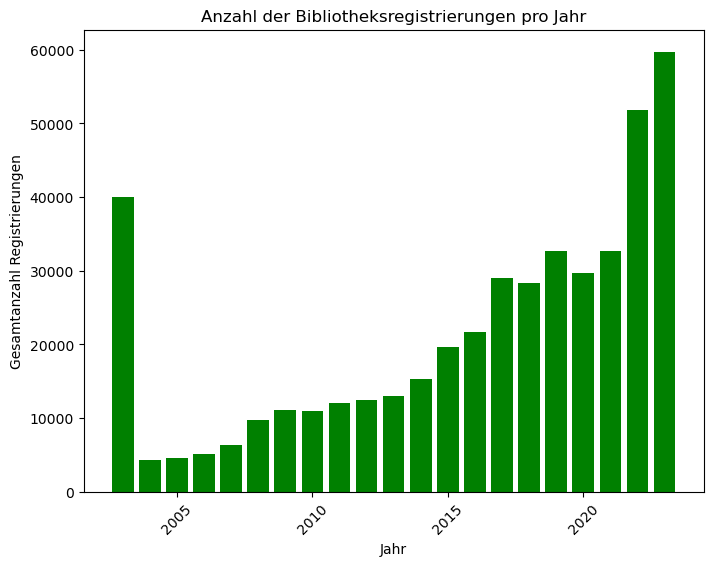

In [59]:
# Wie viele Registrierungen gab es pro Jahr insgesamt?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Library_Usage.csv", low_memory=False)

registrierungen_gesamtzahl = df["Year Patron Registered"].value_counts().reset_index()

# Spalten umbenennen
registrierungen_gesamtzahl.columns = ["Jahr", "Gesamtanzahl Registrierungen"]

# Nach Jahr sortieren
registrierungen_gesamtzahl = registrierungen_gesamtzahl.sort_values("Jahr")

print(registrierungen_gesamtzahl)
print()

plt.figure(figsize=(8, 6))
plt.bar(registrierungen_gesamtzahl["Jahr"], registrierungen_gesamtzahl["Gesamtanzahl Registrierungen"], color="green")
plt.xlabel("Jahr")
plt.ylabel("Gesamtanzahl Registrierungen")
plt.title("Anzahl der Bibliotheksregistrierungen pro Jahr")
plt.xticks(rotation=45)  # für bessere Lesbarkeit
plt.show()
